In [1]:
df=pd.read_csv('C:\\documents\\study material\\data science\\Machine learning udemy notes\\DATA\\Telco-Customer-Churn.csv')

df.head()

<IPython.core.display.Javascript object>

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Exploratory Data Analysis

In [2]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [4]:
df.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Churn', ylabel='count'>

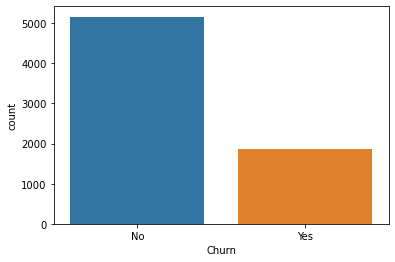

In [8]:
sns.countplot(data=df,x='Churn')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

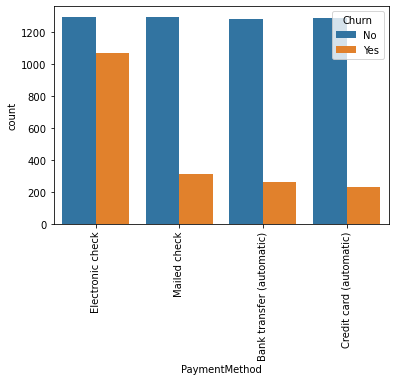

In [13]:
sns.countplot(data=df,x='PaymentMethod',hue='Churn')
plt.xticks(rotation=90);

In [15]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,2223-GDSHL,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='gender', ylabel='count'>

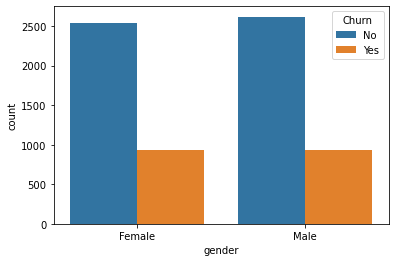

In [17]:
sns.countplot(data=df,x='gender',hue='Churn')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Contract', ylabel='count'>

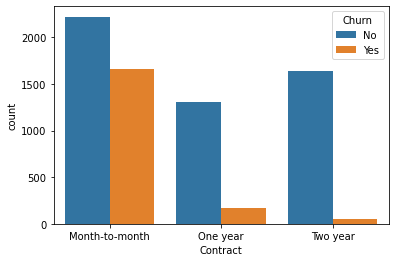

In [26]:
sns.countplot(data=df,x='Contract',hue='Churn')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

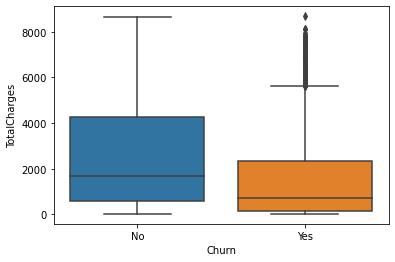

In [36]:
sns.boxplot(data=df,y='TotalCharges',x='Churn')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

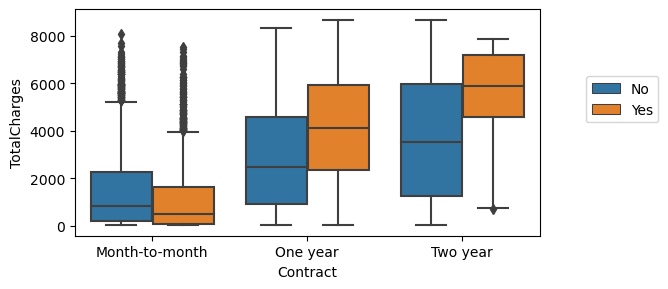

In [39]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

In [47]:
df_cor=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]

In [48]:
df_cor=pd.get_dummies(df_cor)
df_cor.head()

<IPython.core.display.Javascript object>

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1


In [51]:
df_cor.corr()['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

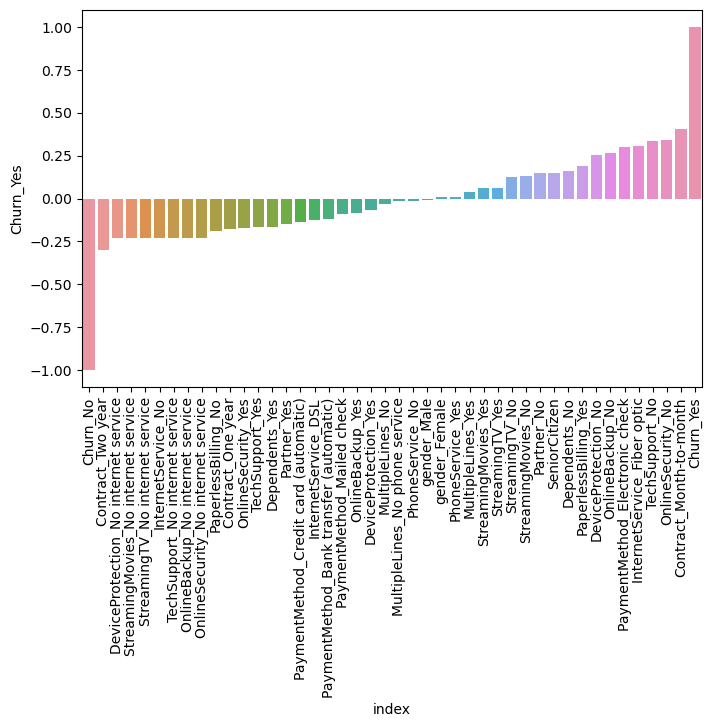

In [61]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(data=df_cor.corr()['Churn_Yes'].sort_values().reset_index(),x='index',y='Churn_Yes')
plt.xticks(rotation=90);

In [68]:
df_cor.corr()['Churn_Yes'].sort_values().drop(['Churn_No','Churn_Yes']).reset_index()

,index,Churn_Yes
0,Contract_Two year,-0.301552
1,DeviceProtection_No internet service,-0.227578
2,StreamingMovies_No internet service,-0.227578
3,StreamingTV_No internet service,-0.227578
4,InternetService_No,-0.227578
5,TechSupport_No internet service,-0.227578
6,OnlineBackup_No internet service,-0.227578
7,OnlineSecurity_No internet service,-0.227578
8,PaperlessBilling_No,-0.191454
9,Contract_One year,-0.178225


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

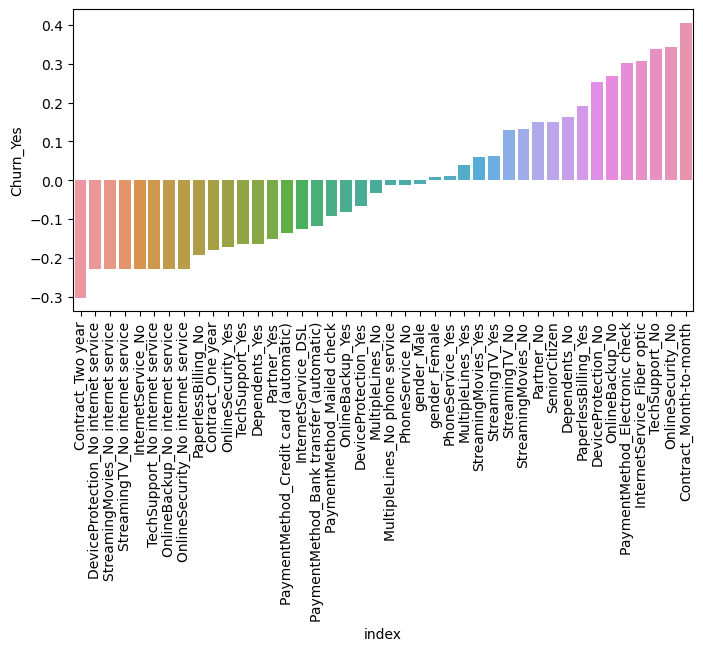

In [71]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(data=df_cor.corr()['Churn_Yes'].sort_values().drop(['Churn_No','Churn_Yes']).reset_index(),x='index',y='Churn_Yes')
plt.xticks(rotation=90);

## Churn Analysis

In [73]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='tenure', ylabel='Count'>

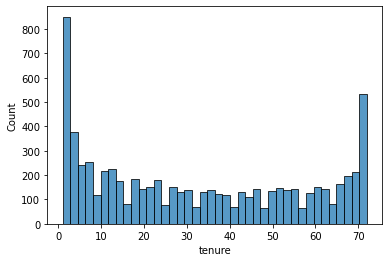

In [76]:
sns.histplot(data=df,x='tenure',bins=40)

<IPython.core.display.Javascript object>

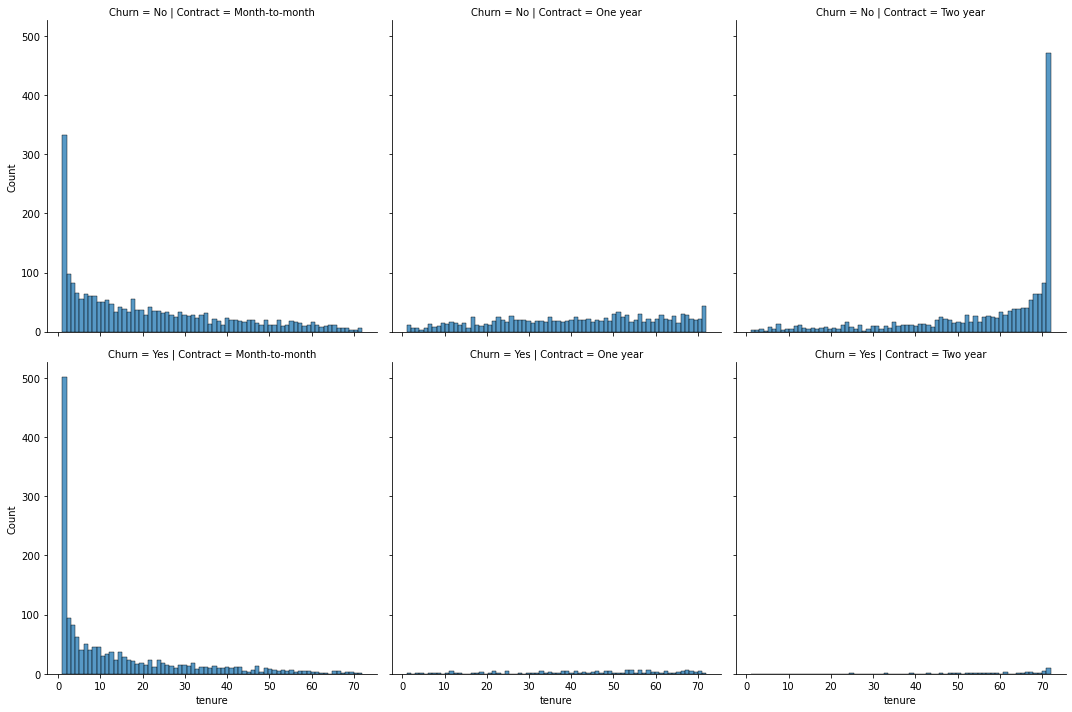

In [2]:
sns.displot(data=df,x='tenure',col='Contract',bins=70,row='Churn')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

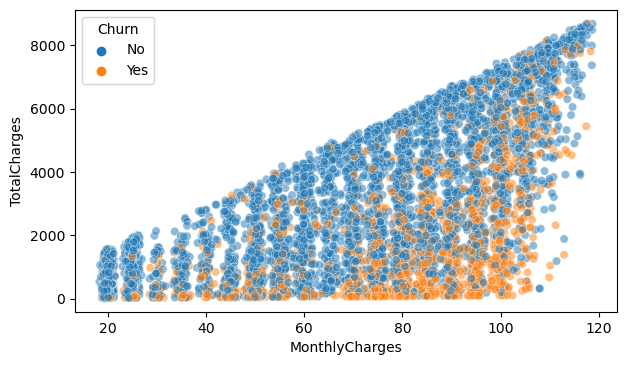

In [99]:
plt.figure(figsize=(7,4),dpi=100)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Churn',alpha=0.5)

In [114]:
df_cohort=df[['tenure','Churn']]

In [116]:
df_cohort=pd.get_dummies(df_cohort,drop_first=True)
df_cohort.head()

<IPython.core.display.Javascript object>

,tenure,Churn_Yes
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1


In [125]:
df_cohort=df_cohort.groupby('tenure')['Churn_Yes'].agg(['sum','count'])

In [134]:
df_cohort['%cohort']=100*df_cohort['sum']/df_cohort['count']

In [144]:
df_cohort=pd.DataFrame(df_cohort['%cohort'])
df_cohort

<IPython.core.display.Javascript object>

,%cohort
tenure,
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, '%Churn')

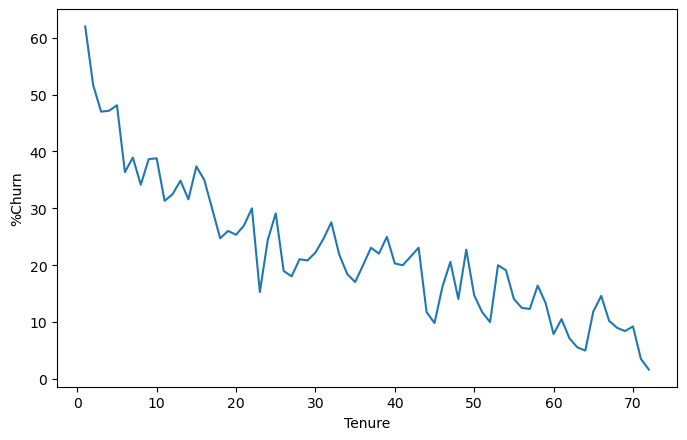

In [150]:
plt.figure(figsize=(8,5),dpi=100)
plt.plot(df_cohort)
plt.xlabel('Tenure')
plt.ylabel('%Churn')

In [151]:
def cohort_groups(x):
    if 0<=x<12:
        return '0-12 Months'
    elif 12<=x<24:
        return '12-24 Months'
    elif 24<=x<48:
        return '24-48 Months'
    else:
        return 'Over 48 Months' 

In [154]:
df['Tenure_cohort']=df['tenure'].apply(cohort_groups)

In [155]:
df[['Tenure_cohort','tenure']]

,Tenure_cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,24-48 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

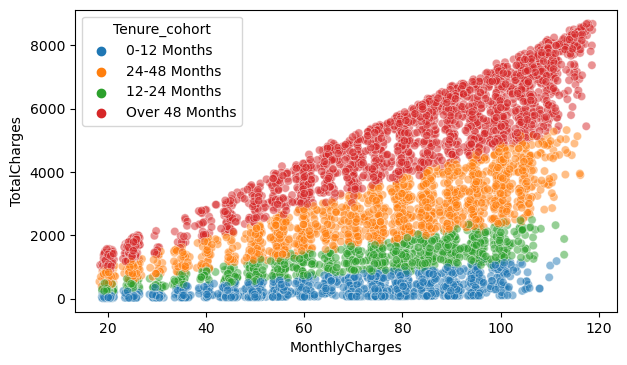

In [156]:
plt.figure(figsize=(7,4),dpi=100)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Tenure_cohort',alpha=0.5)

In [ ]:
sns.countplot(x='Tenure_cohort',data=df,hue='Churn')

<IPython.core.display.Javascript object>

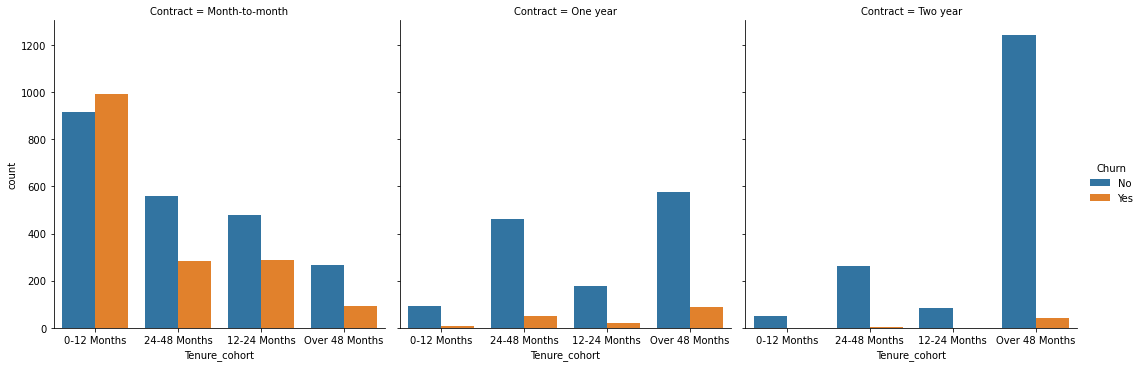

In [161]:

sns.catplot(data=df,x='Tenure_cohort',col='Contract',kind='count',hue='Churn')

## Predictive Modeling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
X=pd.get_dummies(df.drop('Churn',axis=1),drop_first=True)
y=df['Churn']

<IPython.core.display.Javascript object>

In [34]:

def Model_Report(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(classification_report(y_test,preds))
    confusion_matrix(y_test,preds)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [6]:
# support vector

In [7]:
svm = SVC()

In [8]:
Model_Report(svm,X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.79      1.00      0.88       557
         Yes       0.00      0.00      0.00       147

    accuracy                           0.79       704
   macro avg       0.40      0.50      0.44       704
weighted avg       0.63      0.79      0.70       704



C:\Users\njjanaki\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\njjanaki\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\njjanaki\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# KNN

In [9]:
KNN_Model=KNeighborsClassifier(n_neighbors=15)

In [10]:
Model_Report(KNN_Model,X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.85      0.90      0.88       557
         Yes       0.53      0.41      0.46       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.78      0.80      0.79       704



In [ ]:
# Descision tree

In [35]:
Des_model=DecisionTreeClassifier(max_depth=7)

In [36]:
Model_Report(Des_model,X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.54      0.48      0.51       147

    accuracy                           0.81       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.80      0.81      0.80       704



In [31]:
A=pd.DataFrame(Des_model.feature_importances_).sort_values(by=0,ascending=False)
A.columns=['Importance']
A.head()

<IPython.core.display.Javascript object>

,Importance
1,0.388385
7041,0.282329
3,0.076737
2,0.057519
7059,0.030646


In [20]:
from sklearn.tree import plot_tree

<IPython.core.display.Javascript object>

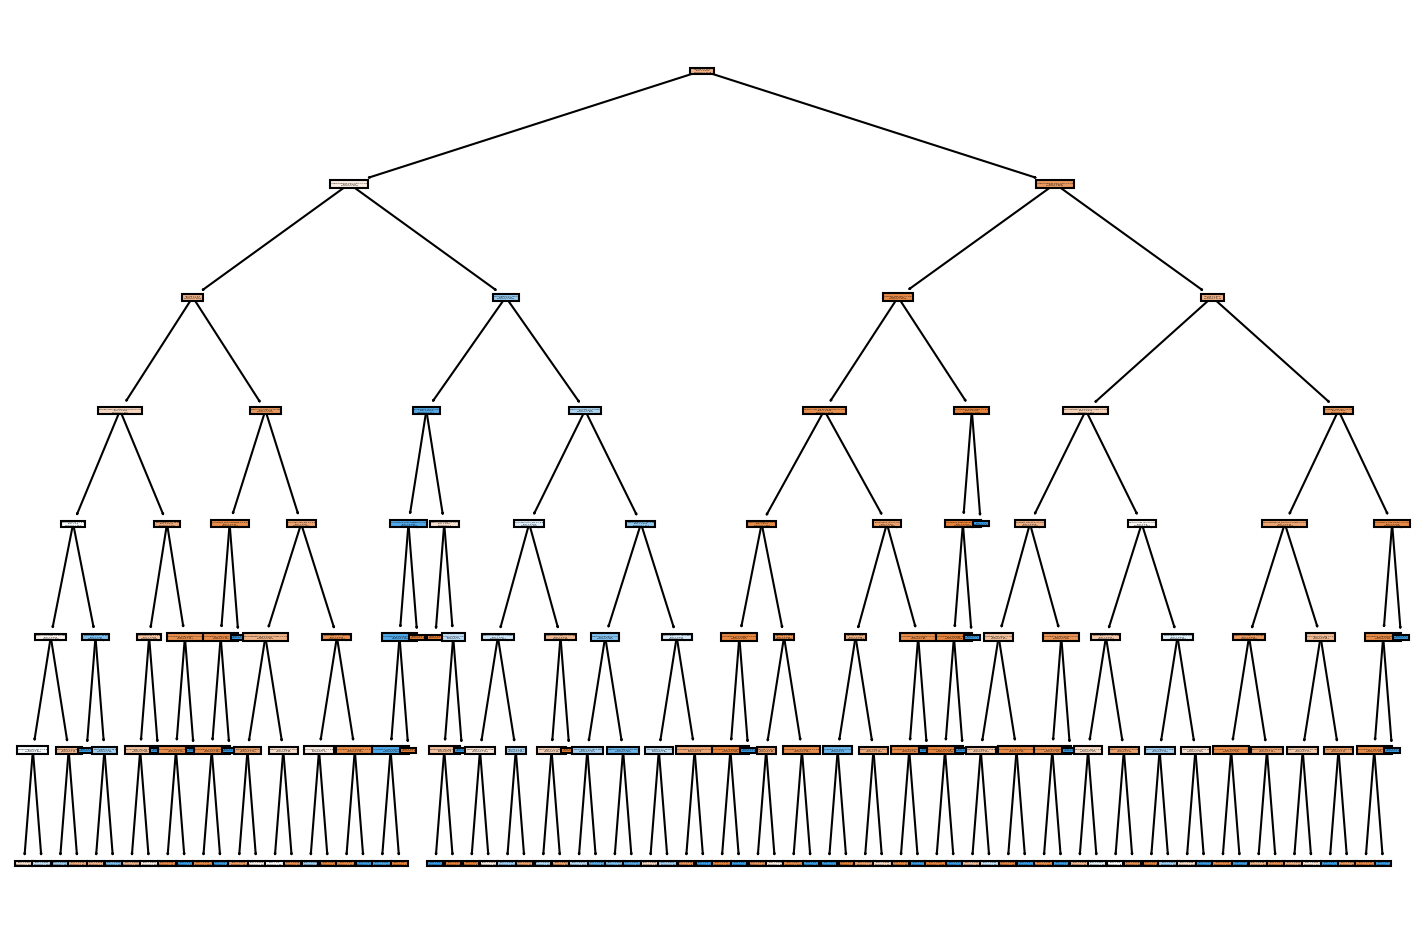

In [18]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(Des_model,filled=True,feature_names=X.columns);

In [38]:
# Random Forest

In [39]:
Ran_model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [40]:
Model_Report(Ran_model,X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.85      0.92      0.88       557
         Yes       0.55      0.37      0.44       147

    accuracy                           0.80       704
   macro avg       0.70      0.64      0.66       704
weighted avg       0.78      0.80      0.79       704



In [41]:
# Adaboost

In [42]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [43]:
gb_model=GradientBoostingClassifier(max_depth=3,n_estimators=50)

In [44]:
Model_Report(gb_model,X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.60      0.50      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



In [45]:
Ad_model=AdaBoostClassifier(n_estimators=50)

In [46]:
Model_Report(Ad_model,X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.51      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704

